# Prediction of Student Performance Using Supervised Machine Learning

In [13]:
# IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [14]:
# Getting the data

data = {
    'Hours': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8],
    'Scores': [21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69, 30, 54, 35, 76, 86]
}

df = pd.DataFrame(data)

# Now, you have a DataFrame containing the 'Hours' and 'Scores' columns
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Examining The data**

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


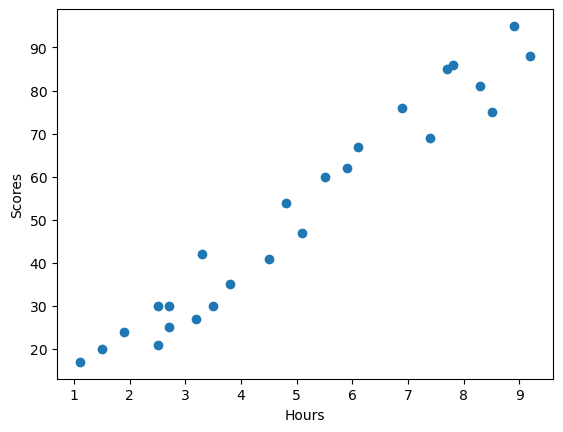

In [5]:
# Scatter plot to see the relationship between Hours and score

plt.scatter(df.Hours, df.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**Now Lets do a simple linear Regression**

In [15]:
# Lets choose our (x) and (y) variables
x= df.Hours
y= df.Scores

In [16]:
# Now Lets split data into training and testing.

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 10)
print('Training: ', x_train.shape, y_train.shape)
print('Testing: ', x_test.shape, y_test.shape)

Training:  (17,) (17,)
Testing:  (8,) (8,)


In [17]:
# Creating a linear regression model

model = LinearRegression()
model

LinearRegression()

In [19]:
# Fitting the model

x_train = x_train.to_numpy().reshape(-1, 1)  # Reshape NumPy array
y_train = y_train.to_numpy().reshape(-1, 1)  # Reshape NumPy array
x_test = x_test.to_numpy().reshape(-1, 1)  # Reshape NumPy array
y_test = y_test.to_numpy().reshape(-1, 1)  # Reshape NumPy array


model.fit(x_train, y_train)

LinearRegression()

In [20]:
# Now predict on the testing set
y_pred = model.predict(x_test)
y_pred

array([[16.3158208 ],
       [52.56027486],
       [34.43804783],
       [33.43125744],
       [46.51953252],
       [75.71645385],
       [12.28865924],
       [56.58743642]])

**Now we evaluate model performance**

In [21]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = model.intercept_

print("R2 score: ", r2)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Intercept: ", intercept)

R2 score:  0.8944542088325093
Mean Squared Error:  31.556542406092728
Mean Absolute Error:  5.449694297153993
Intercept:  [1.21396494]


R2 score : 0.89 is very high which suggests that the model explains approximately 89%.

MSE : lower mse is better. mse of 31.556 is kinnda lower.

Mae : lower mae is better 5.4 is lower which is better.

Intercept : This is the predicted score when study time is zero. 

**Plotting Actual value vs Predicted Value**

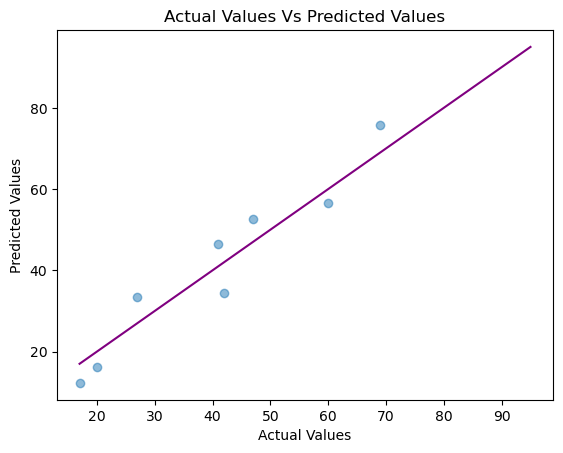

In [23]:
# Predicted values are plotted on the y-axis while Actual Values are plotted on x- axis

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = "purple")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values Vs Predicted Values')
plt.show()

**Residual PLot**

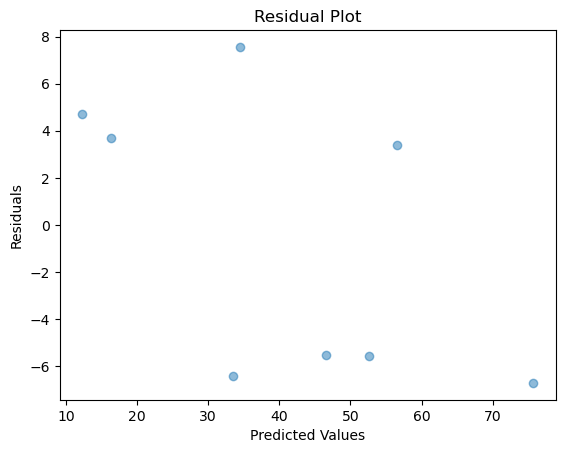

In [25]:
#Residuals are plotted against predicted values
#If the linear is a good fit the residuals should show random scatter of points around zero.

plt.scatter(y_pred, y_test - y_pred , alpha = 0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# What will the predicted value if a student studies 9.25hrs?

**Now Predicting The new Value**

In [27]:
import numpy as np

# Convert the scalar value into a 2D array with a single feature
x = np.array([9.25]).reshape(-1, 1)

# Now you can use model.predict
predictions = model.predict(x)
predictions

array([[94.34207607]])